<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Test_stage2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'nltk', 'spacy', 'textblob', 'backtrader'}
missing = required - installedPackages
if missing:
    !pip install nltk==3.4
    !pip install textblob==0.15.3
    !pip install -U SpaCy==2.2.0
    !python -m spacy download en_core_web_lg
    !pip install backtrader==1.9.74.123

<ipython-input-21-7d167d446a72>:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.4-py3-none-any.whl size=1436384 sha256=59ec1a8f30afb49b983b5be17d4e4a66a6433f66c91b84644fd9edf8467edfce
  Stored in directory: /root/.cache/pip/wheels/30/cb/3e/ae17c28eb286abfcd886fdab69f9533bb060dc0a74f3b41d0d
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.5/636.5 kB 17.0 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run su

In [2]:
!pip install tensorflow

In [4]:
!pip install keras

In [11]:
#NLP libraries
from textblob import TextBlob
import spacy
import nltk
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import csv
import pandas as pd
#import keras #This line can be removed as it's not needed.

#Run the command python -m spacy download en_core_web_sm to download this
#https://spacy.io/models
import en_core_web_lg
nlp = en_core_web_lg.load()

#Libraries for processing the news headlines
from lxml import etree
import json
from io import StringIO
from os import listdir
from os.path import isfile, join
from pandas.tseries.offsets import BDay
from scipy.stats.mstats import winsorize
from copy import copy

# Libraries for Classification for modeling the sentiments
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Keras package for the deep learning model for the sentiment prediction.
# Importing from tensorflow.keras instead of keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding # Importing Embedding directly from tensorflow.keras.layers

# Load libraries
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf

#Additional Libraries
import json
import zipfile
import os.path
import sys

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
import spacy
import en_core_web_lg
import pandas as pd
import numpy as np
import nltk
import plotly.express as px
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Keras package for the deep learning model for the sentiment prediction.
# Importing from tensorflow.keras instead of keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding # Importing Embedding directly from tensorflow.keras.layers

nltk.download('vader_lexicon')

import panel as pn
import warnings; warnings.filterwarnings('ignore')

def show_panel(df,top=20):
    return pn.widgets.Tabulator(df.head(top),
                    show_index=False,
                    pagination='local',
                         page_size=10)

pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [12]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP', 'FB']
start = '2010-01-01'
end = '2018-12-31'
df_ticker_return = pd.DataFrame()
for ticker in tickers:
    ticker_yf = yf.Ticker(ticker)
    if df_ticker_return.empty:
        df_ticker_return = ticker_yf.history(start = start, end = end)
        df_ticker_return['ticker']= ticker
    else:
        data_temp = ticker_yf.history(start = start, end = end)
        data_temp['ticker']= ticker
        # Use pandas.concat instead of append
        df_ticker_return = pd.concat([df_ticker_return, data_temp])
df_ticker_return.to_csv(r'return_data.csv')

ERROR:yfinance:$FB: possibly delisted; no timezone found


In [27]:
df_ticker_return.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close
Date,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,TSLA,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,TSLA,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,TSLA,NaN
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,TSLA,NaN
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500.0,0.0,0.0,TSLA,NaN


In [28]:
# We can preread the data
df_ticker_return = pd.read_csv('return_data.csv',
                               index_col='Date')
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Adj Close
Date,,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500.0,0.0,0.0,TSLA,NaN
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500.0,0.0,0.0,TSLA,NaN
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000.0,0.0,0.0,TSLA,NaN
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000.0,0.0,0.0,TSLA,NaN
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500.0,0.0,0.0,TSLA,NaN


In [29]:
tickers = list(df_ticker_return['ticker'].unique())
print(tickers)

['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']


In [33]:
fig = px.line(df_ticker_return,y='Close',facet_col='ticker',
              facet_col_wrap=3,height=900,template='plotly_white')
fig.update_traces(line_color='#CDE10F', line_width=2)
fig.show(renderer='iframe')

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Raw Headline Data.zip to Raw Headline Data.zip


In [40]:
import zipfile
import json
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file relative to the current directory
zip_file_path = os.path.join(current_directory, "Raw Headline Data.zip")

# Print the path to verify it's correct
print(f"Looking for the file at: {zip_file_path}")

# Try opening the zip file
try:
    z = zipfile.ZipFile(zip_file_path, "r")
    testFile = z.namelist()[10]
    fileData = z.open(testFile).read()
    fileDataSample = json.loads(fileData)['content'][1:500]

    # json format
    print(fileDataSample)

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}. Please ensure the file is present and the path is correct.")

Looking for the file at: /content/Raw Headline Data.zip
li class="n-box-item date-title" data-end="1305172799" data-start="1305086400" data-txt="Tuesday, December 17, 2019">Wednesday, May 11, 2011</li><li class="n-box-item sa-box-item" data-id="76179" data-ts="1305149244"><div class="media media-overflow-fix"><div class="media-left"><a class="box-ticker" href="/symbol/CSCO" target="_blank">CSCO</a></div><div class="media-body"><h4 class="media-heading"><a href="/news/76179" sasource="on_the_move_news_fidelity" target="_blank">Cisco (NASDAQ:CSCO): Pr


In [43]:
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm

# helper function performs the jsn parsing

def jsonParser(json_data):
    xml_data = json_data['content']

    tree = etree.parse(StringIO(xml_data), parser=etree.HTMLParser())

    headlines = tree.xpath("//h4[contains(@class, 'media-heading')]/a/text()")
    assert len(headlines) == json_data['count']

    main_tickers = list(map(lambda x: x.replace('/symbol/', ''), tree.xpath("//div[contains(@class, 'media-left')]//a/@href")))
    assert len(main_tickers) == json_data['count']
    final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]/ul/li[1]")]
    if len(final_headlines) == 0:
        final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]")]
        final_headlines = [f.replace(h, '').split('\xa0')[0].strip() for f,h in zip (final_headlines, headlines)]

    return main_tickers, final_headlines


data = None
data_df_news = []
ret = []
ret_f = []
with zipfile.ZipFile("/content/Raw Headline Data.zip", "r") as z:

    for filename in tqdm(z.namelist()):
#         print(filename)
        try:
            #print('Running {}'.format(filename))
            with z.open(filename) as f:
                data = f.read()
                json_data = json.loads(data)
            if json_data.get('count', 0)> 10:

                #Step 1: Parse the News Jsons
                main_tickers, final_headlines = jsonParser(json_data)

                if len(final_headlines) != json_data['count']:
                    continue

                #Step 2: Prepare Future and Event Return and assign Future and Event return for each ticker.
                file_date = filename.split('/')[-1].replace('.json', '')
                file_date = date(int(file_date[:4]), int(file_date[5:7]), int(file_date[8:]))

               #Step 3: Merge all the data in a data frame
                df_dict = {'ticker': main_tickers,
                           'headline': final_headlines,
                           'date': [file_date] * len(main_tickers)}

                df_f = pd.DataFrame(df_dict)
                data_df_news.append(df_f)

        except:
            pass

data_df_news=pd.concat(data_df_news)
display(data_df_news.head())
print(data_df_news.shape)

  0%|          | 0/3159 [00:00<?, ?it/s]

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


(122613, 3)


In [44]:
# select all tickers except for empty
data_df_news = data_df_news[~(data_df_news['ticker'] == '')]
data_df_news.shape

(110711, 3)

In [45]:
px.bar(data_df_news['ticker'].value_counts()[:100],template="plotly_white")

In [46]:
#Computing the return
df_ticker_return['ret_curr'] = df_ticker_return['Close'].pct_change()

#Computing the event return
# rtm1 = df_ticker_return['ret_curr'].shift(-1) # return a day before the news
rtp1 = df_ticker_return['ret_curr'].shift(1) # return a day after the news
rt = df_ticker_return['ret_curr'] # return the day of the news

df_ticker_return['eventRet'] =  rt + rtp1
df_ticker_return.reset_index(level=0, inplace=True)

df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())

In [47]:
# merge on date and ticker
df_all = pd.merge(data_df_news, df_ticker_return,
                  how='left',
                  left_on=['date','ticker'],
                  right_on=['date','ticker'])

df_all = df_all[df_all['ticker'].isin(tickers)]
df_all = df_all[['ticker','headline','date','eventRet','Close']]
df_all = df_all.dropna()
df_all = df_all.reset_index(drop=True)
df_all.to_csv('combined.csv',index=False)

In [48]:
# preread combined dataframe
data_df = pd.read_csv('combined.csv')
data_df = data_df.dropna()
data_df.head()

,ticker,headline,date,eventRet,Close
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873


In [49]:
print(data_df.shape, data_df.ticker.unique().shape)

(2586, 5) (11,)


In [50]:
data_df['sent_blob'] = data_df['headline'].apply(lambda row: TextBlob(row).sentiment.polarity)
data_df.head()

,ticker,headline,date,eventRet,Close,sent_blob
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,0.262500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,-0.043750
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,0.000000
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,0.113636
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,0.125000


In [51]:
# remove it again
data_df.drop(['sent_blob'],axis=1,inplace=True)

In [52]:
from nltk.tokenize import word_tokenize
from copy import deepcopy
from textblob import TextBlob

class make_labels:

    def __init__(self,df,corpus):
        self.df = df
        self.corpus = corpus

    @staticmethod
    def isfloat(element: any) -> bool:
        #If you expect None to be passed:
        if element is None:
            return False
        try:
            float(element)
            return True
        except ValueError:
            return False

    def percentage_val(self,ldf,text):

        ldf = deepcopy(ldf)
        ldf['perc_sent'] = None

        for index,row in ldf.iterrows():

            # tokenise document
            tokens = word_tokenize(row[text])

            # find values with percentage
            for ii,token in enumerate(tokens):

                # only if a % is found

                if(token is '%'):

                    if(tokens[ii-1] is 'a'):
                        ldf._set_value(index,'perc_sent',True)
                        pass

                    elif('-' in tokens[ii-1] and tokens[ii-1].split('-')[0] is ''):

                        val = float(tokens[ii-1])
                        ldf._set_value(index,'perc_sent',False)

                    # two values separated by dash - (range of values)

                    elif('-' in tokens[ii-1] and tokens[ii-1].split('-')[0] is not ''):

                        val0 = tokens[ii-1].split('-')[0]
                        val1 = tokens[ii-1].split('-')[1]

                        # if both values are integers
                        if(val0.isnumeric() and val1.isnumeric()):

                            val = (float(val0) + float(val1))/2
                            ldf._set_value(index,'perc_sent',True)

                    # approximate value

                    elif('~' in tokens[ii-1]):

                        val0 = tokens[ii-1].replace('~','')
                        val = float(val0)
                        ldf._set_value(index,'perc_sent',True)

                    # value in excess

                    elif('+' in tokens[ii-1]):

                        val0 = tokens[ii-1].replace('+','')
                        val = float(val0)

                        ldf._set_value(index,'perc_sent',True)

                    # if its just a float

                    elif(self.isfloat(tokens[ii-1])):
                        ldf.loc[index,'perc_sent'] = True

                    # if its an integer

                    elif(tokens[ii-1].isnumeric()):

                        ldf.loc[index,'perc_sent'] = True

        return ldf

    def sentiment_val(self,ldf,text):
        ldf = deepcopy(ldf)
        ldf['blob_sent'] = ldf[text].apply(lambda row: TextBlob(row).sentiment.polarity)
        return ldf

    def create_label(self,option):

        if(option is 'percentage'):
            tdf = self.percentage_val(self.df.dropna(),self.corpus)
        elif(option is 'sentiment'):
            tdf = self.sentiment_val(self.df,self.corpus)

        return tdf

In [54]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from copy import deepcopy
from textblob import TextBlob

# ... (rest of your code remains the same)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [55]:
labels = make_labels(df=data_df,corpus='headline')
tdf = labels.create_label('percentage')
tdf.head()

,ticker,headline,date,eventRet,Close,perc_sent
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,False
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,True
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,False
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,False
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,False


In [56]:
print(tdf.perc_sent.value_counts(dropna=False))

perc_sent
True     1156
None      970
False     460
Name: count, dtype: int64


In [57]:
display(tdf[tdf['perc_sent'].isna()].head(1))

,ticker,headline,date,eventRet,Close,perc_sent
35,JPM,Quite a boo-boo: The NY,2011-07-07,0.007283,28.581972,None


In [58]:
labels = make_labels(df=tdf,corpus='headline')
tdf = labels.create_label('sentiment')
tdf.head()

,ticker,headline,date,eventRet,Close,perc_sent,blob_sent
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,False,0.262500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,True,-0.043750
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,False,0.000000
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,False,0.113636
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,False,0.125000


In [59]:
tdf[tdf['perc_sent'].isna()]

,ticker,headline,date,eventRet,Close,perc_sent,blob_sent
35,JPM,Quite a boo-boo: The NY,2011-07-07,0.007283,28.581972,None,0.000000
59,GOOG,Quick take on Icahn/Motorola: Even after today...,2011-07-21,0.007602,15.063957,None,0.111111
91,GOOG,More on Google/MMI: As Adam Muller noted last ...,2011-08-15,-0.008683,13.829041,None,0.006667
92,GOOG,"More on Google/MMI: The deal ""will enable Goog...",2011-08-15,-0.008683,13.829041,None,0.250000
153,AAPL,A different take on yesterday's jaw-dropping t...,2011-10-05,0.009831,11.395421,None,-0.050000
...,...,...,...,...,...,...,...
2582,SHOP,Wells Fargo starts Shopify (NYSE:SHOP) at Outp...,2018-12-18,-0.038500,13.439000,None,0.000000
2585,TSLA,"Responding to a comment on Twitter, Elon Musk ...",2018-12-24,-0.062323,19.692667,None,-0.156250
2586,AMZN,Amazon (NASDAQ:AMZN) is among the companies th...,2018-12-24,-0.081390,67.197998,None,0.200000
2587,AAPL,Chinese companies urge employees to boycott (N...,2018-12-24,-0.064770,35.060501,None,-0.012500


In [60]:
# index values of headlines which contain ''
tdf = tdf.drop(tdf[tdf['headline'] == ''].index)

In [61]:
tdf[tdf['headline'].str.contains('beats')]

,ticker,headline,date,eventRet,Close,perc_sent,blob_sent
23,NKE,Nike (NYSE:NKE): FQ4 EPS of $1.24 beats by $0....,2011-06-27,-0.006869,17.429331,True,0.000000
65,NFLX,Netflix (NASDAQ:NFLX): Q2 EPS of $1.26 beats b...,2011-07-25,0.020689,40.218571,False,0.000000
70,AMZN,Amazon.com (NASDAQ:AMZN): Q2 EPS of $0.41 beat...,2011-07-26,-0.010762,10.709000,True,0.000000
82,DIS,Walt Disney (NYSE:DIS): FQ3 EPS of $0.78 beats...,2011-08-09,-0.010554,30.182461,False,0.000000
87,NVDA,More on Nvidia (NASDAQ:NVDA): Q2 solidly beats...,2011-08-11,0.041079,0.307453,True,0.233333
...,...,...,...,...,...,...,...
2379,JPM,JPMorgan Chase (NYSE:JPM): Q2 EPS of $2.29 bea...,2018-07-13,-0.000262,88.640343,None,0.000000
2393,GOOG,Alphabet (NASDAQ:GOOG): Q2 Adj. EPS of $11.75 ...,2018-07-23,0.015650,60.059204,None,0.000000
2401,AMZN,Amazon (NASDAQ:AMZN): Q2 EPS of $5.07 beats by...,2018-07-26,-0.011051,90.400002,None,0.000000
2507,NFLX,Netflix (NASDAQ:NFLX): Q3 GAAP EPS of $0.89 be...,2018-10-16,0.020898,346.399994,None,0.000000


In [62]:
tdf.loc[(tdf['headline'].str.contains('misses')),'perc_sent'] = False
tdf.loc[(tdf['headline'].str.contains('beats')),'perc_sent'] = True

In [63]:
# final dataframe
ldf = tdf.loc[~tdf['perc_sent'].isna()]
ldf = ldf.drop(['blob_sent','Close'],axis=1)
ldf['perc_sent'].replace({False:0,True:1},inplace=True)
ldf.head(2)

,ticker,headline,date,eventRet,perc_sent
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,0
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,1


In [65]:
import warnings; warnings.filterwarnings('ignore')
import seaborn as sns; sns.set(style='whitegrid',
                              font_scale=0.7)


class nlp_evals:

    def __init__(self,df,corpus,label,
                 spacy_model='en_core_web_sm',
                 title='accuracy evaluation'
                ):

        self.df = deepcopy(df)
        self.corpus = corpus
        self.label = label
        self.spacy_model = spacy_model
        self.embeddings = self.get_embeddings()
        self.seed = 32
        self.num_folds = 4
        self.title = title

    def get_embeddings(self):

        # NLP pipline
        nlp = spacy.load(self.spacy_model)
        if(self.spacy_model is 'en_core_web_sm'):
            embedding_dims = 96
        elif(self.spacy_model is 'en_core_web_lg'):
            embedding_dims = 300

        # average embedding vector for each document
        all_vectors = np.array([np.array([token.vector for token in nlp(s) ]).mean(axis=0)*np.ones((embedding_dims)) \
                                   for s in self.df[self.corpus]])
        print(all_vectors.shape)
        print('embeddings loaded!')
        return all_vectors

    def tts(self,ratio=0.1):

        # split out validation dataset for the end
        Y = self.df[self.label]
        X = self.embeddings

        X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                            test_size=ratio,
                                                            random_state=32)

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        print('train/test split!')

    def define_models(self,models):
        self.models = models
        print('models set!')

    def kfold(self):

        self.results = []
        self.names = []
        self.test_results = []
        self.train_results = []
        self.cv_results = []

        lX_train = deepcopy(self.X_train)
        lX_test = deepcopy(self.X_test)
        ly_train = deepcopy(self.y_train.to_frame())
        ly_test = deepcopy(self.y_test.to_frame())

        print('model, cv mean, cv std, train, test')

        for name, model in self.models:

            # cross validation on training dataset
            kfold = KFold(n_splits=self.num_folds, shuffle=True,random_state=self.seed)
            cv_results = cross_val_score(model,
                                         self.X_train, self.y_train,
                                         cv=kfold,
                                         scoring='accuracy')
            self.results.append(cv_results)
            self.names.append(name)
            self.cv_results.append(cv_results.mean())

           # Full Training period
            res = model.fit(self.X_train, self.y_train)
            ytrain_res = res.predict(self.X_train)
            acc_train = accuracy_score(ytrain_res,self.y_train)
            self.train_results.append(acc_train)

            # Test results
            ytest_res = res.predict(self.X_test)
            acc_test = accuracy_score(ytest_res, self.y_test)
            self.test_results.append(acc_test)

            msg = "%s: %f (%f) %f %f" % (name,
                                         cv_results.mean(),
                                         cv_results.std(),
                                         acc_train,
                                         acc_test)

            ly_train[f'{name}_train'] = ytrain_res
            ly_test[f'{name}_test'] = ytest_res

            print(msg)
            print(confusion_matrix(ytest_res, self.y_test))


        self.ly_train = ly_train
        self.ly_test = ly_test

        print('evaluation finished!')

    def plot_results(self):

        ldf_res = pd.DataFrame({'cv':self.cv_results,
                                'train':self.train_results,
                                'test':self.test_results})

        plot_df = ldf_res.melt()
        local_names = deepcopy(self.names)
        local_names = local_names * 3

        plot_df['names'] = local_names

        ptable = pd.pivot_table(plot_df,
                                values='value',
                                index='variable',
                                columns='names')

        fig,ax = plt.subplots(figsize=(5,1.5))
        sns.heatmap(ptable,annot=True,
                    fmt=".2f",
                    ax=ax,
                    cmap='crest')
        plt.title(self.title)

In [66]:
# instantiate new evalation class
evals_nlp = nlp_evals(df=ldf,            # define the corpus dataframe
                      corpus='headline', # define which column contains the corpus
                      label='perc_sent',  # define the column which contains the label
                      title='self defined labels')

(1725, 96)
embeddings loaded!


In [67]:
evals_nlp.tts()

train/test split!


In [68]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

evals_nlp.define_models(models)

models set!


In [69]:
evals_nlp.kfold()

model, cv mean, cv std, train, test
LR: 0.785438 (0.022422) 0.806057 0.745665
[[ 14  10]
 [ 34 115]]
KNN: 0.717784 (0.025416) 0.826031 0.670520
[[ 13  22]
 [ 35 103]]
CART: 0.673325 (0.032823) 1.000000 0.670520
[[ 15  24]
 [ 33 101]]
SVM: 0.774485 (0.029301) 0.806701 0.722543
[[  5   5]
 [ 43 120]]
RF: 0.756443 (0.031275) 1.000000 0.722543
[[  5   5]
 [ 43 120]]
evaluation finished!


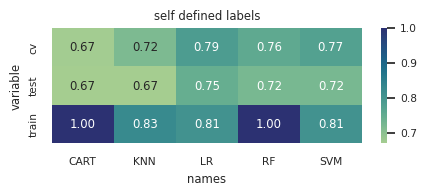

In [70]:
evals_nlp.plot_results()

In [71]:
all_test = evals_nlp.ly_test

# index of all misses
wrong_index = all_test[all_test['LR_test'] != all_test['perc_sent']].index
wrong_index = list(wrong_index)
show_panel(ldf.loc[wrong_index,:],50)

Tabulator(page_size=10, pagination='local', show_index=False, value=     ticker               ...)

In [72]:
all_test.drop(['perc_sent'],axis=1,inplace=True)
pd.concat([ldf.loc[wrong_index,:],all_test.loc[wrong_index]],axis=1)

,ticker,headline,date,eventRet,perc_sent,LR_test,KNN_test,CART_test,SVM_test,RF_test
727,TSLA,The selloff in Tesla (TSLA -14.5%) gathers mom...,2013-07-16,-0.163416,0,1,1,1,1,1
386,GOOG,More on ValueClick's Q1: The company is guidin...,2012-05-02,0.003988,0,1,1,1,1,1
1473,AMZN,Amazon.com (AMZN -1.8%) could exceed $240B in ...,2016-05-03,0.018458,0,1,0,1,1,1
2382,NFLX,Netflix (NFLX -5.3%) announces it's developing...,2018-07-17,-0.040613,0,1,1,1,1,0
388,NFLX,Netflix (NFLX -7.6%) closed at levels last see...,2012-05-03,-0.065435,0,1,1,0,1,1
925,AMZN,Whole Foods (WFM +4.5%) gains amid unconfirmed...,2014-06-05,0.053395,1,0,0,1,1,1
462,GOOG,Google (NASDAQ:GOOG) is upgraded to overweight...,2012-08-13,0.027508,1,0,0,1,1,1
1730,NVDA,Nvidia (NASDAQ:NVDA) -2.9% premarket after Pac...,2017-04-04,-0.075173,0,1,1,1,1,1
178,AAPL,Eric Savitz's advice to everyone shocked over ...,2011-10-18,0.000594,0,1,1,1,1,1
1931,AMZN,"Online 8,000-lb. gorilla Amazon (AMZN +0.1%) c...",2017-11-07,0.010390,1,0,0,0,0,1


In [74]:
from google.colab import files
uploaded = files.upload()

Saving LabelledNewsData.csv to LabelledNewsData.csv


In [75]:
# read input data
labelled_data = pd.read_csv('LabelledNewsData.csv',encoding = "ISO-8859-1")
labelled_data

,datetime,headline,ticker,sentiment
0,1/16/2020 5:25,$MMM fell on hard times but could be set to re...,MMM,0
1,1/11/2020 6:43,Wolfe Research Upgrades 3M $MMM to ¡§Peer Perf...,MMM,1
2,1/9/2020 9:37,3M $MMM Upgraded to ¡§Peer Perform¡¨ by Wolfe ...,MMM,1
3,1/8/2020 17:01,$MMM #insideday follow up as it also opened up...,MMM,1
4,1/8/2020 7:44,$MMM is best #dividend #stock out there and do...,MMM,0
...,...,...,...,...
9465,4/11/2019 1:24,$WMT - Walmart shifts to remodeling vs. new st...,WMT,1
9466,4/10/2019 6:05,Walmart INC $WMT Holder Texas Permanent School...,WMT,0
9467,4/9/2019 4:38,$WMT $GILD:3 Dividend Stocks Perfect for Retir...,WMT,1
9468,4/9/2019 4:30,Walmart expanding use of #robots to scan shelv...,WMT,1


In [76]:
# instantiate new evalation class
evals_nlp = nlp_evals(df=labelled_data,   # define the corpus dataframe
                      corpus='headline', # define which column contains the corpus
                      label='sentiment',
                      title='expert labels') # define the column which contains the label

evals_nlp.tts()

# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

evals_nlp.define_models(models)
evals_nlp.kfold()

(9470, 96)
embeddings loaded!
train/test split!
models set!
model, cv mean, cv std, train, test
LR: 0.732371 (0.005155) 0.741875 0.722281
[[239 110]
 [153 445]]
KNN: 0.752201 (0.005395) 0.849818 0.732841
[[263 124]
 [129 431]]
CART: 0.641912 (0.010034) 0.999883 0.633580
[[221 176]
 [171 379]]
SVM: 0.782236 (0.003753) 0.823771 0.783527
[[259  72]
 [133 483]]
RF: 0.751965 (0.004277) 0.999883 0.757128
[[227  65]
 [165 490]]
evaluation finished!


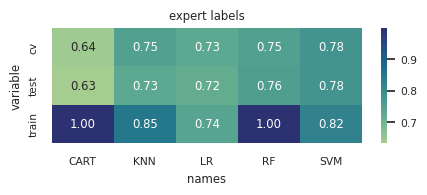

In [77]:
evals_nlp.plot_results()

In [78]:
# instantiate new evalation class
evals_nlp = nlp_evals(df=ldf,   # define the corpus dataframe
                      corpus='headline', # define which column contains the corpus
                      label='perc_sent',  # define the column which contains the label
                      spacy_model = 'en_core_web_lg')


evals_nlp.tts()

# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

evals_nlp.define_models(models)
evals_nlp.kfold()

(1725, 300)
embeddings loaded!
train/test split!
models set!
model, cv mean, cv std, train, test
LR: 0.739691 (0.010627) 0.846005 0.699422
[[ 16  20]
 [ 32 105]]
KNN: 0.698454 (0.011669) 0.794459 0.664740
[[ 13  23]
 [ 35 102]]
CART: 0.644330 (0.029667) 1.000000 0.658960
[[21 32]
 [27 93]]
SVM: 0.733892 (0.026869) 0.735825 0.722543
[[  0   0]
 [ 48 125]]
RF: 0.740979 (0.021755) 1.000000 0.705202
[[  4   7]
 [ 44 118]]
evaluation finished!


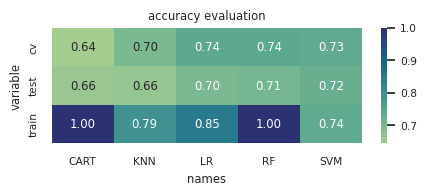

In [79]:
evals_nlp.plot_results()

In [81]:
# instantiate new evalation class
evals_nlp = nlp_evals(df=labelled_data,   # define the corpus dataframe
                      corpus='headline', # define which column contains the corpus
                      label='sentiment',  # define the column which contains the label
                      spacy_model = 'en_core_web_lg')


evals_nlp.tts()

# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

evals_nlp.define_models(models)
evals_nlp.kfold()

(9470, 300)
embeddings loaded!
train/test split!
models set!
model, cv mean, cv std, train, test
LR: 0.871876 (0.002838) 0.896515 0.866948
[[330  64]
 [ 62 491]]
KNN: 0.763934 (0.011891) 0.852399 0.786695
[[289  99]
 [103 456]]
CART: 0.685204 (0.011163) 0.999883 0.696938
[[258 153]
 [134 402]]
SVM: 0.837382 (0.004240) 0.872463 0.836325
[[306  69]
 [ 86 486]]
RF: 0.786460 (0.005540) 0.999883 0.815206
[[285  68]
 [107 487]]
evaluation finished!


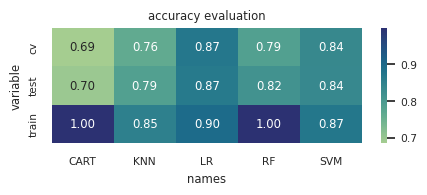

In [82]:
evals_nlp.plot_results()

In [88]:


from scikeras.wrappers import KerasClassifier
import warnings; warnings.filterwarnings('ignore')
# Keras package for the deep learning model for the sentiment prediction.
# Importing from tensorflow.keras instead of keras

class nlp_evals_keras:

    def __init__(self,
                 df,
                 corpus,
                 label,
                 title='accuracy evaluation'
                ):

        self.df = deepcopy(df)
        self.corpus = corpus
        self.label = label
        self.title = title

    # split corpus into training and test subsets

    def tts(self,ratio=0.1):

        # split out validation dataset for the end
        Y = self.df[self.label]
        X = self.paddings

        X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                            test_size=ratio,
                                                            random_state=32)

        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        print('train/test split!')

    # create tokeniser, vocabulary, generate numeric represention & pad all text

    def get_paddings(self):

        ### Create sequence
        vocabulary_size = 20000
        self.tokenizer = Tokenizer(num_words= vocabulary_size)
        self.tokenizer.fit_on_texts(self.df[self.corpus])
        sequences = self.tokenizer.texts_to_sequences(self.df[self.corpus])
        self.paddings = pad_sequences(sequences, maxlen=50)

    # train test evaluation

    def eval_tts(self):

        def create_model(input_length=50):
            model = Sequential()
            model.add(Embedding(20000, 100, input_length=50))
            model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
            model.add(Dense(1, activation='sigmoid'))
            # Build the model with an input shape before compiling
            model.build(input_shape=(None, input_length)) # Add this line
            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'])
            return model

        clf = KerasClassifier(build_fn=create_model,
                                     epochs=10,
                                     verbose=1,
                                     validation_split=0.4)

        clf.fit(self.X_train, self.y_train)

        ytrain_res = clf.predict(self.X_train)
        ytest_res = clf.predict(self.X_test)
        self.clf = clf # save model

        lstm_train_res = accuracy_score(ytrain_res,self.y_train)
        lstm_test_res = accuracy_score(ytest_res,self.y_test)
        print(lstm_train_res,lstm_test_res)

        self.y_train.to_frame()['lstm_res'] = ytrain_res
        self.y_test.to_frame()['lstm_res'] = ytest_res

    # inference on new corpus

    def inference(self,df,corpus:str):
        sequences = self.tokenizer.texts_to_sequences(df[corpus])
        paddings = pad_sequences(sequences, maxlen=50)
        y_pred = self.clf.predict(paddings)
        df['lstm'] = y_pred
        return df

In [89]:
evals_nlp = nlp_evals_keras(df=labelled_data,   # define the corpus dataframe
                            corpus='headline', # define which column contains the corpus
                            label='sentiment')  # define the column which contains the label

evals_nlp.get_paddings() # prepare padded numeric data
evals_nlp.tts()     # split data into training and test subsets
evals_nlp.eval_tts() # train test split evaluation

train/test split!
Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 88ms/step - accuracy: 0.6968 - loss: 0.5325 - val_accuracy: 0.9554 - val_loss: 0.1252
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9809 - loss: 0.0635 - val_accuracy: 0.9704 - val_loss: 0.1013
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9931 - loss: 0.0270 - val_accuracy: 0.9745 - val_loss: 0.0973
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9976 - loss: 0.0126 - val_accuracy: 0.9718 - val_loss: 0.0908
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 85ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9736 - val_loss: 0.1021
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9745 - val_loss: 0.0931
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.9748 - val_loss: 0.1104
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9992

In [90]:
ldf = evals_nlp.inference(ldf,'headline')
ldf.head()

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


,ticker,headline,date,eventRet,perc_sent,lstm
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,0,0
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,1,0
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,0,1
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0,0
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,0,1


In [91]:
from google.colab import files
uploaded = files.upload()

Saving LexiconData.csv to LexiconData.csv


In [92]:
import pandas as pd
lexicon = pd.read_csv('LexiconData.csv')

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def set_analyser(lex,df,corpus):

    # Prepare VADER sentiment analyzer

    sia = SentimentIntensityAnalyzer()
    lex['sentiment'] = (lex['Aff_Score'] + lex['Neg_Score'])/2
    lex = dict(zip(lex.Item, lex.sentiment))
    lex = {k:v for k,v in lex.items() if len(k.split(' '))==1}

    slex = {}
    for k, v in lex.items():
        if v > 0:
            slex[k] = v / max(lex.values()) * 4
        else:
            slex[k] = v / min(lex.values()) * -4

    flex = {}
    flex.update(slex)
    flex.update(sia.lexicon)
    sia.lexicon = flex

    # Evaluate sentiments

    sentiments = np.array([sia.polarity_scores(s)['compound'] for s in df[corpus]])

    return sia,sentiments

In [96]:
analyser,sentiments = set_analyser(lexicon,ldf,'headline')

In [97]:
ldf['vader_sent'] = sentiments
ldf.head()

,ticker,headline,date,eventRet,perc_sent,lstm,vader_sent
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,0,0,0.2115
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,1,0,0.8575
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,0,1,-0.0413
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0,0,0.8886
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,0,1,0.6110
